In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import datetime, time ,date ,timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns
from random import randint
pd.options.mode.chained_assignment = None

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h1> Functions </h1>

<h3> Fonctions générales </h3>

In [3]:
def floatise (df, list_columns_to_floatise):
    for i in list_columns_to_floatise:
        df[i] = df[i].apply(lambda x: float(x.replace(',','.')))
    return (df)

In [4]:
def intise (df, list_columns_to_floatise):
    for i in list_columns_to_floatise:
        df[i] = df[i].astype(int)
    return (df)

In [5]:
def flatten (table):
    if type(table.columns)==pd.MultiIndex:
        columns_to_look = [name_tmp for name_tmp in table.columns]

        columns_df = [ str(t[0])+'_'+str(t[1]) for t in columns_to_look]
        columns_df.insert(0,table.index.name)

        df = pd.DataFrame(columns = columns_df)

        index = 0
        for i in table.index:
            row = [table[r][i] for r in columns_to_look]
            row.insert(0,i)
            df.loc[index] = row
            index = index + 1
        return(df)
    else :
        table = pd.DataFrame(table)
        table.reset_index(level=0, inplace=True)
        return table

In [6]:
def flatten_soft(dataframe):
    res = pd.DataFrame()
    res[dataframe.index.name] = dataframe.index
    for col in dataframe.columns:
        name_tmp=""
        for i in range(len(dataframe.columns[0])):
            name_tmp = name_tmp +'_'+str(col[i])
        res[str(name_tmp)] = dataframe[col].values
    return res

<h3> Fonctions particulières </h3>

In [7]:
def cohort_attribution (x):
    if (x<2017):
        return 2016
    else :
        return x

In [8]:
def customer_category_attribution(x):
    if x==1:
        return 'One-timer'
    if x==2:
        return 'Two-timer'
    else:
        return 'Recurring'

In [9]:
def describe_discount(x):
    if x<5:
        return '<5%'
    if (x>=5) and (x<10):
        return( '5-10%')
    if (x>=10) and (x<20):
        return( '10-20%')
    if (x>=20) and (x<30):
        return( '20-30%')
    if (x>=30) and (x<40):
        return( '30-40%')
    if (x>=40) and (x<50):
        return( '40-50%')
    if (x>=50) and (x<60):
        return( '50-60%')
    if (x>=60) and (x<70):
        return( '60-70%')
    if (x>=70):
        return( '>70%')            

In [10]:
def get_month(x):
    month = date(1900, x, 1).strftime('%B')
    return month

In [11]:
def get_quarter(x):
    if (x>=1) & (x<=3):
        return '1st quarter'
    elif (x>=4) & (x<=6):
        return '2nd quarter'
    if (x>=7) & (x<=9):
        return '3rd  quarter'
    if (x>=10) & (x<=12):
        return '4th quarter'

<h1> Dataset creation </h1>

<h3> Import de la data </h3>

In [12]:
src_root = os.getcwd()
print(src_root)

C:\Users\UgoMANTEL\Work\Github\Vertbaudet_2021\src\notebooks


- Préparation des colonnes:

In [13]:
dict_department = {'B':'BEBE','N':'PAP FILLE','U':'PAP GARCON','D':'CHAUSSURE','F':'FEMME',
'T':'TEXTILE HOME','P':'PUERICULTURE','W':'NON PAP ENFANT','K':'DECO','M':'CHAMBRE ET LITERIE','R':'JOUETS'}

<h3> Création du data </h3>

- Définition des répertoires :

In [14]:
backup_rep = "C:/Users/UgoMANTEL/Work/Github/Vertbaudet_2021/data/4. Back-up"

In [15]:
output_rep = "C:/Users/UgoMANTEL/eleven/Engagements - Vertbaudet/5. Analyses/3. Outputs python"

- Création de la donnée:

In [16]:
df = pd.read_csv(os.path.join(backup_rep,'Raw_Data_Germany.csv'),sep=";")
df.drop(columns=['Unnamed: 0'],inplace=True)

- Conversion des champs:

In [17]:
df['DATERF'] = pd.to_datetime(df.DATERF)
df['DATAUFTRAG1'] = pd.to_datetime(df.DATAUFTRAG1)
df['DATAUFTRAG1_12MONTH'] = pd.to_datetime(df.DATAUFTRAG1_12MONTH)
df['DATAUFTRAG1_24MONTH'] = pd.to_datetime(df.DATAUFTRAG1_24MONTH)

- Calcul des champs:

In [18]:
df['MONTH_RECRUITMENT_NAME'] = df.MONTH_RECRUITMENT.apply(lambda x: get_month(x))

- Rajout du nombre de commandes:

In [19]:
nb_order =  flatten(df.groupby(['ID_ORDER']).agg({'KDNR':'last','DATERF':'last'})).sort_values(by='DATERF',ascending=True)
nb_order['ORDER_NUMBER'] = nb_order.groupby(['KDNR']).cumcount()+1
df = pd.merge(df,nb_order[['ID_ORDER','ORDER_NUMBER']],on='ID_ORDER',how='left')

In [20]:
flatten(df.loc[df.KDNR==33719576].groupby('ORDER_NUMBER').agg({'DATERF':'last'}))

,ORDER_NUMBER,DATERF
0,1,2020-11-19
1,2,2021-01-25


In [21]:
df.loc[df.CLIENT_CATEGORY != 'One-timer'].KDNR.unique()

array([25396773, 25396765, 25402550, ..., 33719576, 33692975, 33640224],
      dtype=int64)

<h1> Analyses </h1>

<h3> Distribution du délai entre les achats : </h3> 

- Définir nombre d'achat :

In [31]:
nb_buy = 5

Entre les achats 1 et 2
360 jours : 0.7523450241444133
720 jours : 0.902985098444736
1080 jours : 0.9687223727591017
Entre les achats 2 et 3
360 jours : 0.8207596598400534
720 jours : 0.9432817259029381
1080 jours : 0.9855311112774422
Entre les achats 3 et 4
360 jours : 0.8634169427354472
720 jours : 0.9626597255087553
1080 jours : 0.9919734973970658
Entre les achats 4 et 5
360 jours : 0.88889705018216
720 jours : 0.9744682101304502
1080 jours : 0.9958573275355506


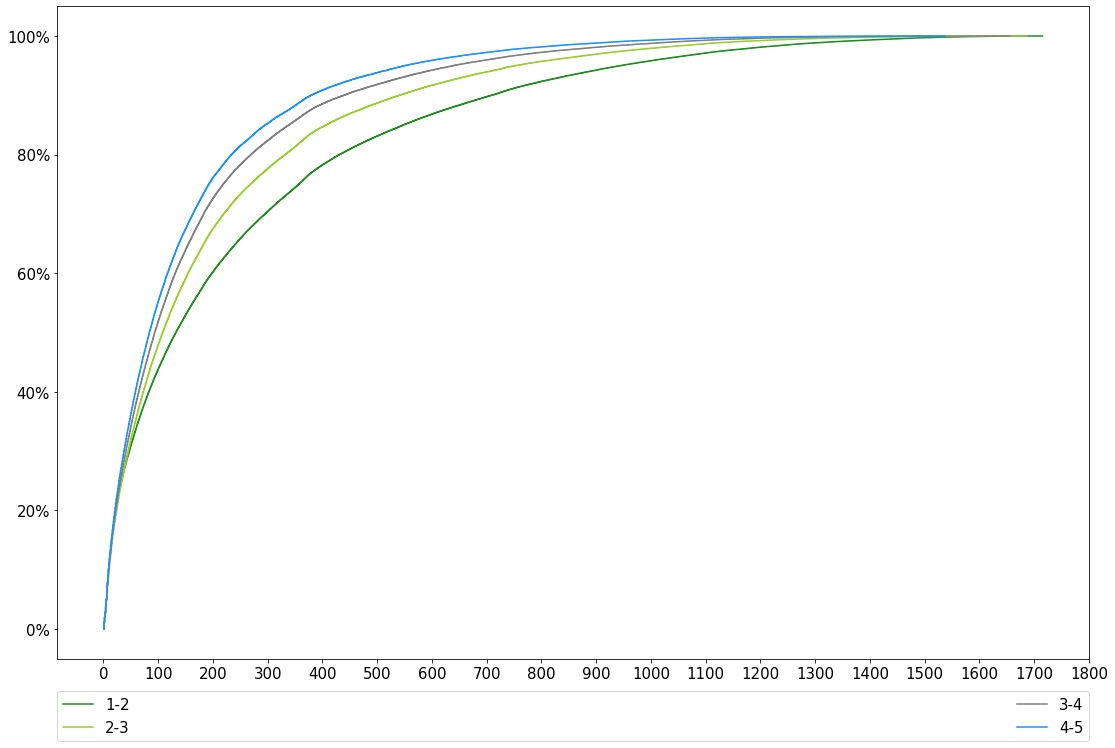

In [33]:
fig, ax = plt.subplots()
colors = ['forestgreen','yellowgreen','grey','dodgerblue','navy']

i = 0
for purch in range(1, nb_buy):
    df_tmp = df.loc[(df.NB_ORDERS>=purch+1) 
                    & (df.ORDER_NUMBER<=purch+1) & (df.ORDER_NUMBER>=purch)].sort_values(by='DATERF',
                                                                                 ascending=True).drop_duplicates(subset='ID_ORDER', keep='first',inplace=False)
    
    df_tmp = df_tmp.groupby(['KDNR','ORDER_NUMBER']).agg({'DATERF' : 'last'})

    ######## Création du dataset
    res_delay = flatten_soft(df_tmp.unstack('ORDER_NUMBER',fill_value=0))
    column_1 = str('_DATERF_'+str(purch))
    column_2 = str('_DATERF_'+str(purch+1))
    res_delay['DELAY'] = ( res_delay[column_2] - res_delay[column_1])
    res_delay['DELAY_days'] = res_delay.DELAY.dt.days
    res_delay = res_delay.loc[res_delay.DELAY_days >0]
    plot_delay = res_delay.DELAY_days.sort_values(ascending=True)
    
    print('Entre les achats '+str(purch)+' et '+str(purch+1))
    print('360 jours : ' + str(sum(plot_delay<360)/len(plot_delay)))
    print('720 jours : ' + str(sum(plot_delay<720)/len(plot_delay)))
    print('1080 jours : ' + str(sum(plot_delay<1080)/len(plot_delay)))
    
    plt.step(plot_delay, np.arange(plot_delay.size)/len(plot_delay), color=colors[i],label=str(purch)+'-'+str(purch+1),linewidth = 1.5, markersize=1) 
    i = i+1

plt.legend(bbox_to_anchor=(0, -0.05, 1, 0), loc=1, ncol=2, mode="expand", borderaxespad=0)

fig.set_size_inches(18.5, 12)
plt.rcParams.update({'font.size': 15})

loc = mtick.MultipleLocator(base=100) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)    
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig('delay_nbpurchase_GER.png',dpi=300, bbox_inches = "tight")
plt.show()


- Calcul des probas :

In [49]:
hist_data = res_delay.loc[res_delay.DELAY_1_2_days<1700].DELAY_1_2_days

In [89]:
sum(hist_data<720)/len(hist_data)

0.9022938499813089

<h3> Distribution du délai 1er/2eme achat par univers d'entré : </h3> 

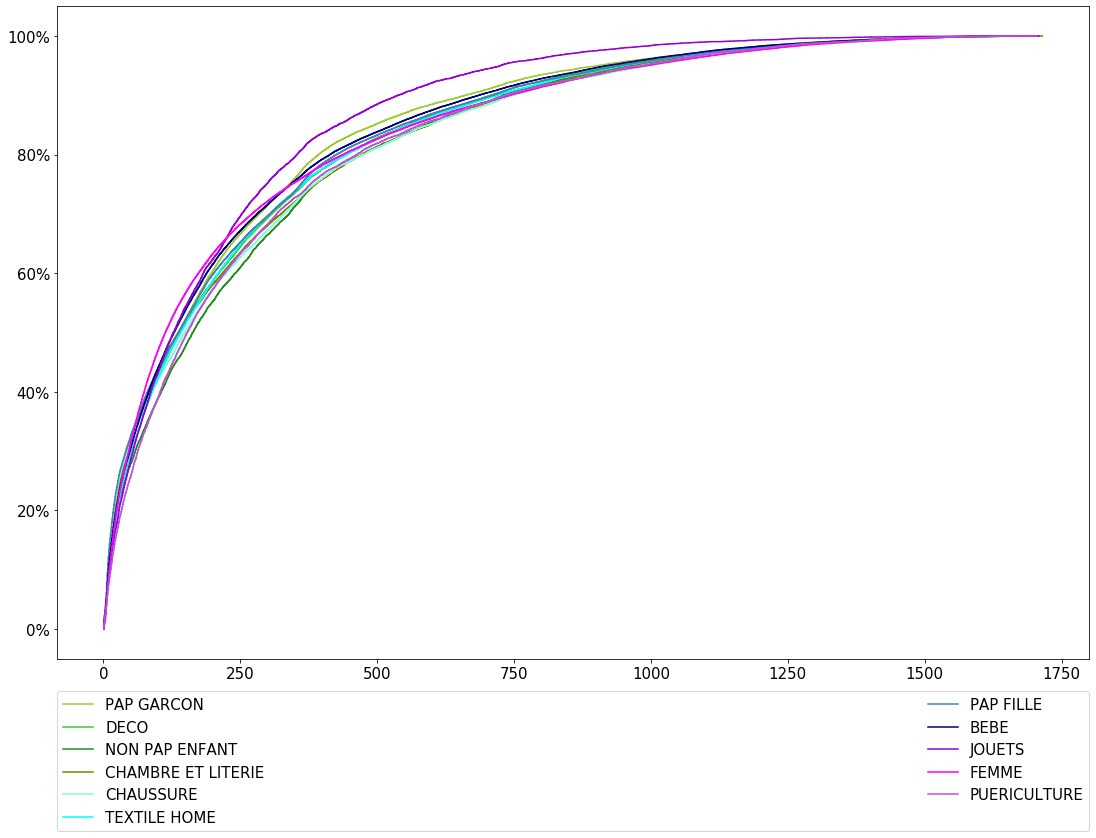

In [39]:
fig, ax = plt.subplots()

colors = []
n = len(df.DEPARTEMENT_FIRST.unique())

colors = ['yellowgreen','limegreen', 'forestgreen', 'olive',
          'aquamarine', 'aqua', 'steelblue','navy',
         'darkviolet', 'magenta','mediumorchid','grey']

i = 0
df = df.loc[df.DEPARTEMENT_FIRST.isnull()==False]
for univ in df.DEPARTEMENT_FIRST.unique():
    df_tmp = df.loc[(df.NB_ORDERS>=2) 
                    & (df.ORDER_NUMBER<=2) & (df.ORDER_NUMBER>=1) & (df.DEPARTEMENT_FIRST == univ)].sort_values(by='DATERF',
                                                                                 ascending=True).drop_duplicates(subset='ID_ORDER', keep='first',inplace=False)
    
    df_tmp = df_tmp.groupby(['KDNR','ORDER_NUMBER']).agg({'DATERF' : 'last'})

    ######## Création du dataset
    res_delay = flatten_soft(df_tmp.unstack('ORDER_NUMBER',fill_value=0))
#     print(univ)
#     print(res_delay.columns)
    res_delay['DELAY'] = ( res_delay._DATERF_2 - res_delay._DATERF_1)
    res_delay['DELAY_days'] = res_delay.DELAY.dt.days
    res_delay = res_delay.loc[res_delay.DELAY_days >0]
    plot_delay = res_delay.DELAY_days.sort_values(ascending=True)
    
    plt.step(plot_delay, np.arange(plot_delay.size)/len(plot_delay), color = colors[i] ,label=univ,linewidth = 1.5, markersize=1) 
    i = i+1

plt.legend(bbox_to_anchor=(0, -0.05, 1, 0), loc=1, ncol=2, mode="expand", borderaxespad=0)


fig.set_size_inches(18.5, 12)
plt.rcParams.update({'font.size': 15})
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig('delay_univers_GER.png',dpi=300, bbox_inches = "tight")

# plt.show()


<h3> Fréquence d'achat par univers d'entré : </h3> 

In [18]:
res_freq = flatten_soft(df.sort_values(by=['DATERF'],ascending = True).groupby(['KDNR']).agg({'DATERF':['first','last'],
                                                                                 'NB_ORDERS' : 'last',
                                                                                 'DEPARTEMENT_FIRST' : 'last'}))
res_freq.columns = ['KDNR','FIRST_ORDER', 'LAST_ORDER','NB_ORDER','ENTRY_DEPARTEMENT']
res_freq

,KDNR,FIRST_ORDER,LAST_ORDER,NB_ORDER,ENTRY_DEPARTEMENT
0,8956580,2019-11-16,2019-11-16,1,PAP GARCON
1,11918894,2017-05-28,2017-05-28,1,PAP GARCON
2,12107245,2018-11-21,2018-11-21,1,NON PAP ENFANT
3,25000120,2017-01-01,2018-12-18,8,DECO
4,25000613,2017-02-20,2019-03-21,9,PAP GARCON
...,...,...,...,...,...
729584,34174676,2020-12-31,2020-12-31,1,PAP GARCON
729585,34174684,2020-12-31,2021-01-18,2,TEXTILE HOME
729586,34174692,2020-12-31,2020-12-31,1,BEBE
729587,34174705,2020-12-31,2020-12-31,1,TEXTILE HOME


In [19]:
res_freq['SENIORITY']= res_freq.apply(lambda row: max(1,((row.LAST_ORDER - row.FIRST_ORDER).days/360)+1), axis=1)

In [20]:
res_freq['FREQUENCY'] = res_freq.NB_ORDER / res_freq.SENIORITY

In [21]:
res_freq

,KDNR,FIRST_ORDER,LAST_ORDER,NB_ORDER,ENTRY_DEPARTEMENT,SENIORITY,FREQUENCY
0,8956580,2019-11-16,2019-11-16,1,PAP GARCON,1.000000,1.000000
1,11918894,2017-05-28,2017-05-28,1,PAP GARCON,1.000000,1.000000
2,12107245,2018-11-21,2018-11-21,1,NON PAP ENFANT,1.000000,1.000000
3,25000120,2017-01-01,2018-12-18,8,DECO,2.988889,2.676580
4,25000613,2017-02-20,2019-03-21,9,PAP GARCON,3.108333,2.895442
...,...,...,...,...,...,...,...
729584,34174676,2020-12-31,2020-12-31,1,PAP GARCON,1.000000,1.000000
729585,34174684,2020-12-31,2021-01-18,2,TEXTILE HOME,1.050000,1.904762
729586,34174692,2020-12-31,2020-12-31,1,BEBE,1.000000,1.000000
729587,34174705,2020-12-31,2020-12-31,1,TEXTILE HOME,1.000000,1.000000


In [22]:
res_freq_tosave  = flatten(res_freq.groupby(['ENTRY_DEPARTEMENT']).agg({'FREQUENCY' : 'mean'}))
res_freq_tosave.to_csv(os.path.join(output_rep,'freq_univ_GER.csv'),sep=";")

<h3> Distribution du délai par rapport au premier achat: </h3> 

- Définir nombre d'achat :

In [24]:
nb_buy = 5

Entre les achats 1 et 2
365 jours : 0.325025459539549
730 jours : 0.3891574571436795
1095 jours : 0.4168525018880493
Total : 0.42945137604870687
Entre les achats 1 et 3
365 jours : 0.14277353414045443
730 jours : 0.2002812542404011
1095 jours : 0.22756510857482776
Total : 0.24192250705534213
Entre les achats 1 et 4
365 jours : 0.06850021039242642
730 jours : 0.11172317565094869
1095 jours : 0.13419747282374048
Total : 0.14724180326183645
Entre les achats 1 et 5
365 jours : 0.03499641579025999
730 jours : 0.06613586553525341
1095 jours : 0.08386502537730146
Total : 0.09490411724957476


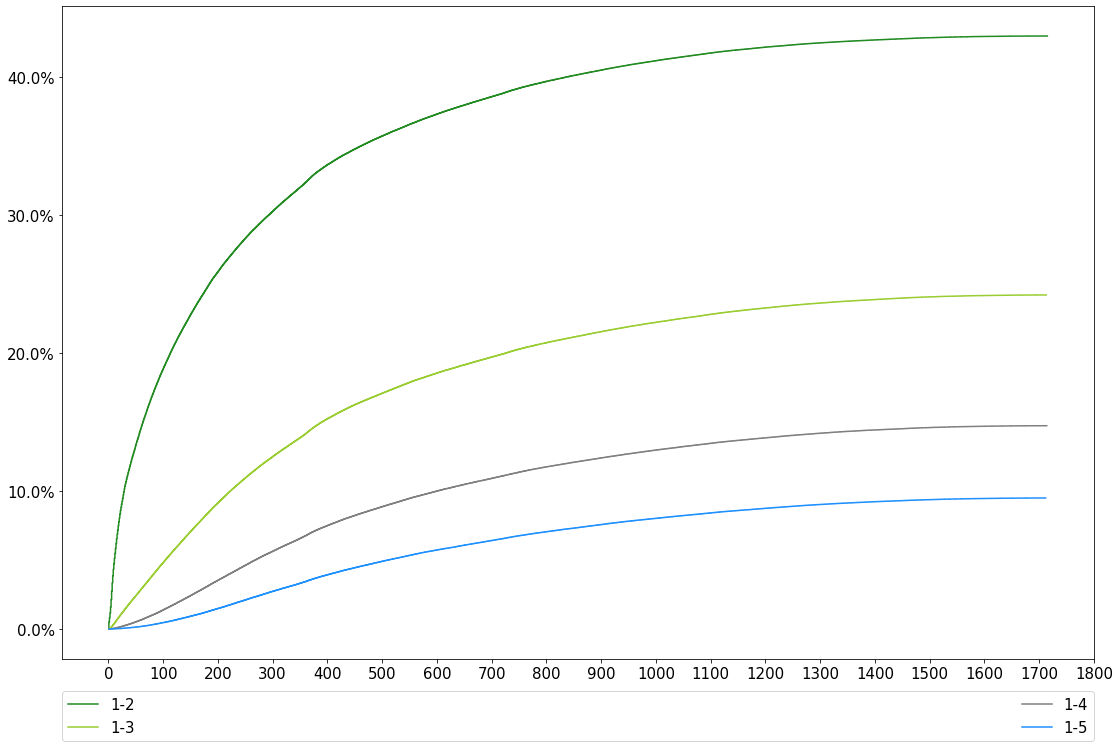

In [25]:
fig, ax = plt.subplots()
colors = ['forestgreen','yellowgreen','grey','dodgerblue','navy']

i = 0
denom = len(df.KDNR.unique())


for purch in range(1, nb_buy):
    df_tmp = df.loc[(df.NB_ORDERS>=purch+1) 
                    & ( (df.ORDER_NUMBER==1) | (df.ORDER_NUMBER == purch+1))].sort_values(by='DATERF',
                                                                                 ascending=True).drop_duplicates(subset='ID_ORDER', keep='first',inplace=False)
        
    df_tmp = df_tmp.groupby(['KDNR','ORDER_NUMBER']).agg({'DATERF' : 'last'})

    ######## Création du dataset
    res_delay = flatten_soft(df_tmp.unstack('ORDER_NUMBER',fill_value=0))
    column_1 = str('_DATERF_1')
    column_2 = str('_DATERF_'+str(purch+1))
    res_delay['DELAY'] = ( res_delay[column_2] - res_delay[column_1])
    res_delay['DELAY_days'] = res_delay.DELAY.dt.days
    res_delay = res_delay.loc[res_delay.DELAY_days >0]
    plot_delay = res_delay.DELAY_days.sort_values(ascending=True)
    
#     if (purch==1):
#         denom = len(plot_delay)
    
    print('Entre les achats '+str(1)+' et '+str(purch+1))
    print('365 jours : ' + str(sum(plot_delay<365)/denom))
    print('730 jours : ' + str(sum(plot_delay<730)/denom))
    print('1095 jours : ' + str(sum(plot_delay<1095)/denom))
    print('Total : ' + str(sum(plot_delay<1750)/denom))
    
    plt.step(plot_delay, np.arange(plot_delay.size)/denom, color=colors[i],label=str(1)+'-'+str(purch+1),linewidth = 1.5, markersize=1) 
    i = i+1

plt.legend(bbox_to_anchor=(0, -0.05, 1, 0), loc=1, ncol=2, mode="expand", borderaxespad=0)

fig.set_size_inches(18.5, 12)
plt.rcParams.update({'font.size': 15})

loc = mtick.MultipleLocator(base=100) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig('delay_nbpurchase_from1_GER.png',dpi=300, bbox_inches = "tight")
plt.show()


- Calcul des probas :

In [49]:
hist_data = res_delay.loc[res_delay.DELAY_1_2_days<1700].DELAY_1_2_days

In [89]:
sum(hist_data<720)/len(hist_data)

0.9022938499813089

<h3> Distribution du délai 1er/2eme achat par mois d'entré : </h3> 

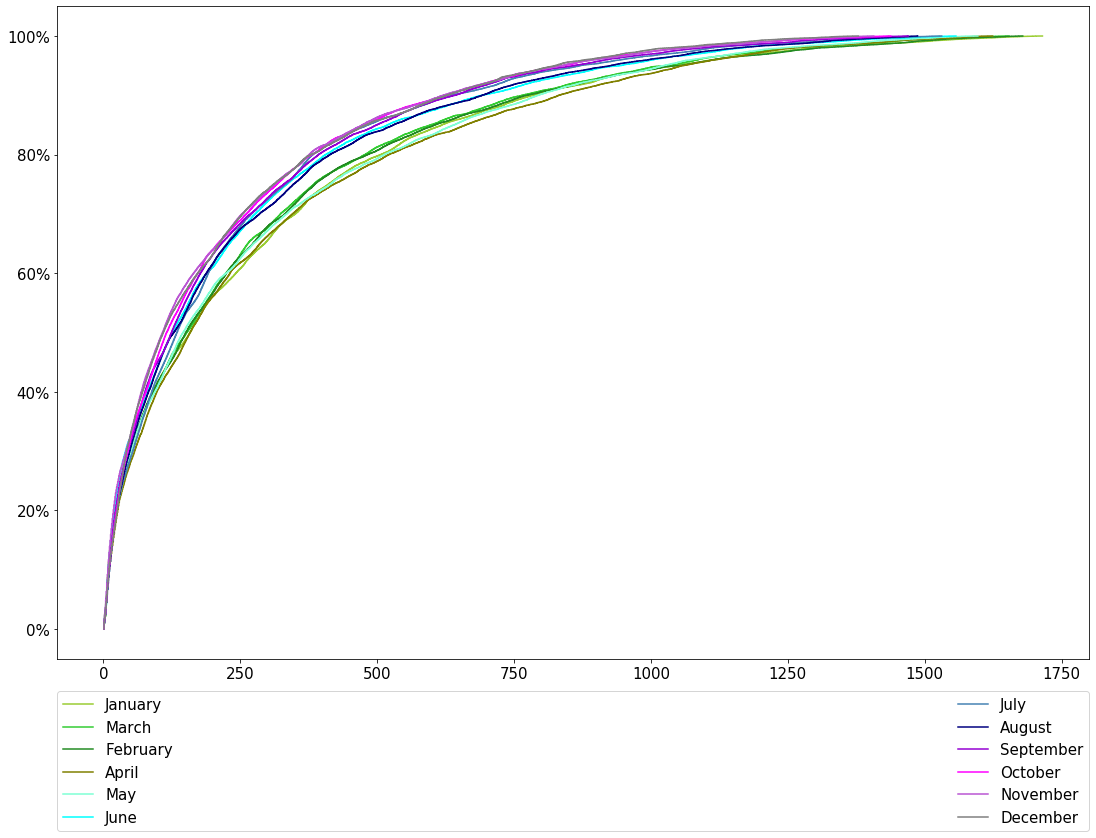

In [40]:
fig, ax = plt.subplots()

colors = []
n = len(df.MONTH_RECRUITMENT_NAME.unique())

colors = ['yellowgreen','limegreen', 'forestgreen', 'olive',
          'aquamarine', 'aqua', 'steelblue','navy',
         'darkviolet', 'magenta','mediumorchid','grey']

i = 0
for month in df.MONTH_RECRUITMENT_NAME.unique():
    df_tmp = df.loc[(df.NB_ORDERS>=2) 
                    & (df.ORDER_NUMBER<=2) & (df.ORDER_NUMBER>=1) & (df.MONTH_RECRUITMENT_NAME == month)].sort_values(by='DATERF',
                                                                                 ascending=True).drop_duplicates(subset='ID_ORDER', keep='first',inplace=False)
    
    df_tmp = df_tmp.groupby(['KDNR','ORDER_NUMBER']).agg({'DATERF' : 'last'})

    ######## Création du dataset
    res_delay = flatten_soft(df_tmp.unstack('ORDER_NUMBER',fill_value=0))
#     print(univ)
#     print(res_delay.columns)
    res_delay['DELAY'] = ( res_delay._DATERF_2 - res_delay._DATERF_1)
    res_delay['DELAY_days'] = res_delay.DELAY.dt.days
    res_delay = res_delay.loc[res_delay.DELAY_days >0]
    plot_delay = res_delay.DELAY_days.sort_values(ascending=True)
    
    plt.step(plot_delay, np.arange(plot_delay.size)/len(plot_delay), color = colors[i] ,label=month,linewidth = 1.5, markersize=1) 
    i = i+1

plt.legend(bbox_to_anchor=(0, -0.05, 1, 0), loc=1, ncol=2, mode="expand", borderaxespad=0)


fig.set_size_inches(18.5, 12)
plt.rcParams.update({'font.size': 15})
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig('delay_per_month_GER.png',dpi=300, bbox_inches = "tight")

# plt.show()


<h3> Distribution du délai 1er/2eme achat par trimestre entrée : </h3> 

In [20]:
df['QUARTER_RECRUITMENT'] = df.MONTH_RECRUITMENT.apply(lambda x: get_quarter(x))

365 jours : 0.725359404724637
365 jours : 0.7346012410940014
365 jours : 0.7756593335906342
365 jours : 0.7893949808858821


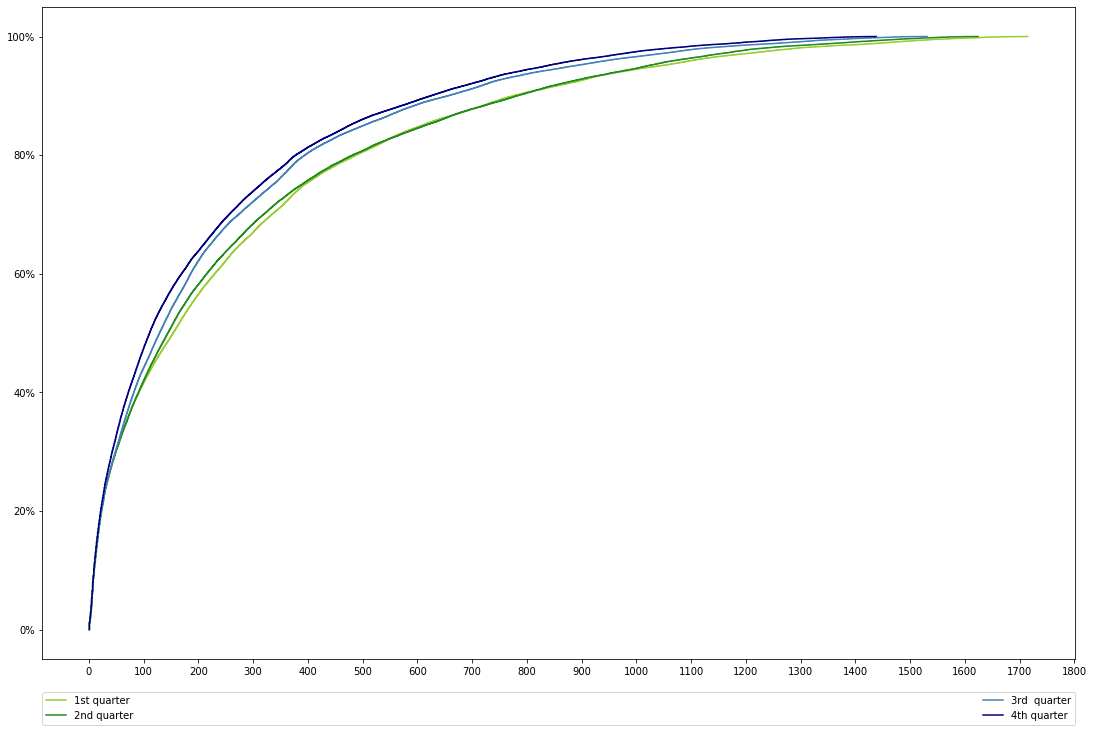

In [21]:
fig, ax = plt.subplots()

colors = []
n = len(df.QUARTER_RECRUITMENT.unique())

colors = ['yellowgreen', 'forestgreen','steelblue','navy']

i = 0
for month in df.QUARTER_RECRUITMENT.unique():
    df_tmp = df.loc[(df.NB_ORDERS>=2) 
                    & (df.ORDER_NUMBER<=2) & (df.ORDER_NUMBER>=1) & (df.QUARTER_RECRUITMENT == month)].sort_values(by='DATERF',
                                                                                 ascending=True).drop_duplicates(subset='ID_ORDER', keep='first',inplace=False)
    
    df_tmp = df_tmp.groupby(['KDNR','ORDER_NUMBER']).agg({'DATERF' : 'last'})

    ######## Création du dataset
    res_delay = flatten_soft(df_tmp.unstack('ORDER_NUMBER',fill_value=0))
#     print(univ)
#     print(res_delay.columns)
    res_delay['DELAY'] = ( res_delay._DATERF_2 - res_delay._DATERF_1)
    res_delay['DELAY_days'] = res_delay.DELAY.dt.days
    res_delay = res_delay.loc[res_delay.DELAY_days >0]
    plot_delay = res_delay.DELAY_days.sort_values(ascending=True)
    
    print('365 jours : ' + str(sum(plot_delay<365)/len(plot_delay)))
    
    plt.step(plot_delay, np.arange(plot_delay.size)/len(plot_delay), color = colors[i] ,label=month,linewidth = 1.5, markersize=1) 
    i = i+1

plt.legend(bbox_to_anchor=(0, -0.05, 1, 0), loc=1, ncol=2, mode="expand", borderaxespad=0)


fig.set_size_inches(18.5, 12)
plt.rcParams.update({'font.size': 15})
loc = mtick.MultipleLocator(base=100) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig('delay_per_quarter_GER.png',dpi=300, bbox_inches = "tight")

# plt.show()
